<a href="https://colab.research.google.com/github/MarcoLope/PROYECTOO/blob/master/Copia_de_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [0]:
path = '/content/lista-de-escuelas-de-atencion-prioritaria.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

In [0]:
df.loc[10:19]

,No.,NIVEL,ZONA_ESCOLAR,NOMBRE DE ESCUELA,CLAVE_DEL_CENTRO_DE_TRABAJO,TURNO,NâMERO_ALUMNAS,NâMERO_ALUMNOS,MUNICIPIO,DIRECCIÃN,CÃDIGO_POSTAL,ESTADO
10,11,PREESCOLAR,3,La Pajarita,24EJN0012U,Matutino,72,91,San Luis PotosÃ­,"JuliÃ¡n Carrillo esq. AgustÃ­n Vera, Col. Del ...",78250.0,San Luis PotosÃ­
11,12,PREESCOLAR,3,Educ. Ma. De la Luz Wong,24EJN0028V,Matutino,34,46,San Luis PotosÃ­,"HÃ­dalgo no. 704, Zona Centro",78340.0,San Luis PotosÃ­
12,13,PREESCOLAR,4,Vicente Rivera,24EJN0015R,Matutino,79,78,San Luis PotosÃ­,"ConstituciÃ³n 1600, Col. JuliÃ¡n Carrillo",78340.0,San Luis PotosÃ­
13,14,PREESCOLAR,4,Ricardo Flores MagÃ³n,24EJN0026X,Matutino,48,46,San Luis PotosÃ­,"Tuna s/n Manzana no. 33 / Pitahaya y Agave, Lo...",78109.0,San Luis PotosÃ­
14,15,PREESCOLAR,5,Martha Gallego Briones,24EJN0393S,Matutino,50,45,Rioverde,"Hacienda de Santo Domingo no. 200, Fracc. Gabr...",79610.0,San Luis PotosÃ­
15,16,PREESCOLAR,5,Profra. MarÃ­a ConcepciÃ³n Ledesma CalderÃ³n,24EJN0375C,Matutino,27,44,Rioverde,"Dr. Gallardo no. 910, Col. Centro",79610.0,San Luis PotosÃ­
16,17,PREESCOLAR,6,Margarita Grizelda RenterÃ­a CÃ¡rdenas,24EJN0412Q,Matutino,46,43,San Luis PotosÃ­,Calle de la Linaza no. 304 / C.del Arroz- Alpi...,78010.0,San Luis PotosÃ­
17,18,PREESCOLAR,6,Margarita Reyes,24EJN0010W,Matutino,72,67,San Luis PotosÃ­,"JardÃ­n Lerdo de Tejada s/ n, Barrio de San Se...",78340.0,San Luis PotosÃ­
18,19,PREESCOLAR,7,Manuel JosÃ© OthÃ³n,24EJN0009G,Matutino,44,33,San Luis PotosÃ­,"ZenÃ³n FernÃ¡ndez no. 940, Barrio de San Migue...",78330.0,San Luis PotosÃ­
19,20,PREESCOLAR,7,Lic. Luis Donaldo Murrieta,24EJN0372F,Matutino,97,87,San Luis PotosÃ­,"Gardenia no. 425, Fracc. JardÃ­nes del Sur",78399.0,San Luis PotosÃ­


In [0]:
df.drop([0,10,19], axis=0).head()

In [0]:
df[10:].head() #df.tail(-100) )

,No.,NIVEL,ZONA_ESCOLAR,NOMBRE DE ESCUELA,CLAVE_DEL_CENTRO_DE_TRABAJO,TURNO,NâMERO_ALUMNAS,NâMERO_ALUMNOS,MUNICIPIO,DIRECCIÃN,CÃDIGO_POSTAL,ESTADO
10,11,PREESCOLAR,3,La Pajarita,24EJN0012U,Matutino,72,91,San Luis PotosÃ­,"JuliÃ¡n Carrillo esq. AgustÃ­n Vera, Col. Del ...",78250.0,San Luis PotosÃ­
11,12,PREESCOLAR,3,Educ. Ma. De la Luz Wong,24EJN0028V,Matutino,34,46,San Luis PotosÃ­,"HÃ­dalgo no. 704, Zona Centro",78340.0,San Luis PotosÃ­
12,13,PREESCOLAR,4,Vicente Rivera,24EJN0015R,Matutino,79,78,San Luis PotosÃ­,"ConstituciÃ³n 1600, Col. JuliÃ¡n Carrillo",78340.0,San Luis PotosÃ­
13,14,PREESCOLAR,4,Ricardo Flores MagÃ³n,24EJN0026X,Matutino,48,46,San Luis PotosÃ­,"Tuna s/n Manzana no. 33 / Pitahaya y Agave, Lo...",78109.0,San Luis PotosÃ­
14,15,PREESCOLAR,5,Martha Gallego Briones,24EJN0393S,Matutino,50,45,Rioverde,"Hacienda de Santo Domingo no. 200, Fracc. Gabr...",79610.0,San Luis PotosÃ­


In [0]:
df.NIVEL.unique()

In [0]:
df.TURNO.value_counts()

In [0]:
df.agg(['count', 'size', 'nunique'])

In [0]:
df.groupby('ZONA_ESCOLAR').agg(['count', 'size', 'nunique']).stack()

In [0]:
df.CLAVE_DEL_CENTRO_DE_TRABAJO.value_counts()

In [0]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

In [0]:
df_dropped = df.dropna(subset=['CLAVE_DEL_CENTRO_DE_TRABAJO'])
df_dropped.head()

In [0]:
df_dropped.shape

(97, 12)

In [0]:
df_copy = df.copy()
df_copy.head()
df_copy.shape

(97, 12)

In [0]:
df_dropped['NâMERO_ALUMNAS'].dtype

dtype('O')

In [0]:
df_copy['ZONA_ESCOLAR'].fillna(value=np.round(df['ZONA_ESCOLAR'].mean(),decimals=0), inplace=True)

In [0]:
df_copy.agg(['count', 'size', 'nunique'])

,No.,NIVEL,ZONA_ESCOLAR,NOMBRE DE ESCUELA,CLAVE_DEL_CENTRO_DE_TRABAJO,TURNO,NâMERO_ALUMNAS,NâMERO_ALUMNOS,MUNICIPIO,DIRECCIÃN,CÃDIGO_POSTAL,ESTADO
count,97,97,97,97,97,97,97,97,97,97,95,97
size,97,97,97,97,97,97,97,97,97,97,97,97
nunique,97,6,20,93,96,2,74,69,17,94,52,1


In [0]:
list(df['TURNO'].unique())

['Matutino', 'Vespertino']

In [0]:
list(df['ZONA_ESCOLAR'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [0]:
keys = list(df['TURNO'].unique())
vals = range(1,8)
act = dict(zip(keys, vals))
act

{'Matutino': 1, 'Vespertino': 2}

In [0]:
df_copy['TURNO'] = df['TURNO'].map(act)
df_copy.head()

,No.,NIVEL,ZONA_ESCOLAR,NOMBRE DE ESCUELA,CLAVE_DEL_CENTRO_DE_TRABAJO,TURNO,NâMERO_ALUMNAS,NâMERO_ALUMNOS,MUNICIPIO,DIRECCIÃN,CÃDIGO_POSTAL,ESTADO
0,1,INICIAL,1,Mercedes MÃ©ndez Contreras,24EPR0199E,1,146,139,Soledad de Graciano SÃ¡nchez,"Calle Circuito Ote S/N, Ponciano Arriaga",78437.0,San Luis PotosÃ­
1,2,INICIAL,1,Guadalupe Rodea de Jonguitud,24EDI0008L,1,66,78,San Luis PotosÃ­,"Vallarta 155, Barrio de Tequisquiapan",78230.0,San Luis PotosÃ­
2,3,INICIAL,2,Profra. Ether MÃ©ndez LÃ³pez,24EDI0010Z,1,102,114,San Luis PotosÃ­,Prol. Moctezuma 1305,78030.0,San Luis PotosÃ­
3,4,INICIAL,2,Ma. Guadalupe Barrientos,24EDI0019R,1,70,75,Soledad de Graciano SÃ¡nchez,"BerriozÃ¡bal No 98, Zona Centro",78433.0,San Luis PotosÃ­
4,5,INICIAL,2,Profra. Francisca Zavala Salazar,24EDI0015V,1,55,58,Rioverde,"Galeana 123, Zona Centro",79610.0,San Luis PotosÃ­


In [0]:
list(df_copy['TURNO'].unique())

[1, 2]

In [0]:
df_copy['ZONA_ESCOLAR'].mean()

8.422680412371134

In [0]:
df_copy['TURNO'][df_copy['ZONA_ESCOLAR'] == 6]

16    1
17    1
44    1
45    1
86    1
87    1
Name: TURNO, dtype: int64

In [0]:

df_copy['TURNO'][df_copy['ZONA_ESCOLAR'] == 6].mean()

1.0

In [0]:
df_copy.groupby(["TURNO", "ZONA_ESCOLAR", "CLAVE_DEL_CENTRO_DE_TRABAJO"]).count()

In [0]:
df_copy.groupby(["CLAVE_DEL_CENTRO_DE_TRABAJO", "ZONA_ESCOLAR"])[["CLAVE_DEL_CENTRO_DE_TRABAJO", "MUNICIPIO"]].count()

In [0]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

In [0]:
df_sample.groupby(["ESTADO",  "MUNICIPIO"])[["ZONA_ESCOLAR"]].agg([np.sum, np.mean,
                                                              np.count_nonzero])

In [0]:
df_sample.groupby(["ESTADO", "NâMERO_ALUMNOS"]).agg({'ZONA_ESCOLAR':np.mean,'TURNO':np.max})

ZONA_ESCOLAR     TURNO
ESTADO           NâMERO_ALUMNOS                        
San Luis PotosÃ­ 106                       13.0  Matutino
                 158                        6.0  Matutino
                 16                        10.5  Matutino
                 57                        13.0  Matutino

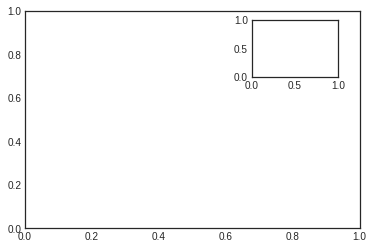

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

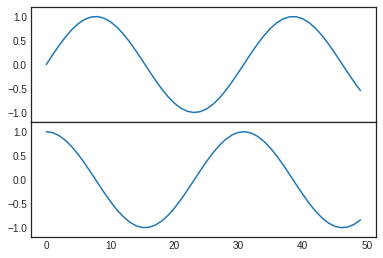

In [0]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

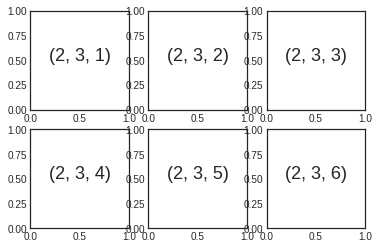

In [0]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

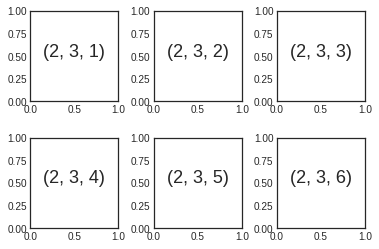

In [0]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

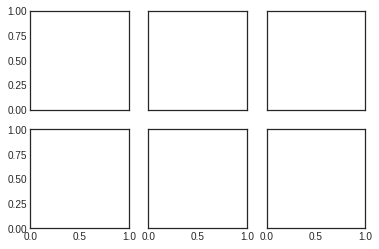

In [0]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

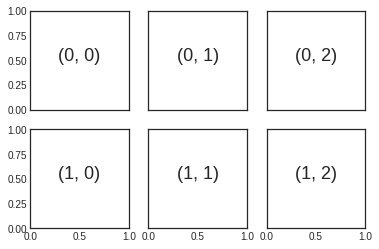

In [0]:
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

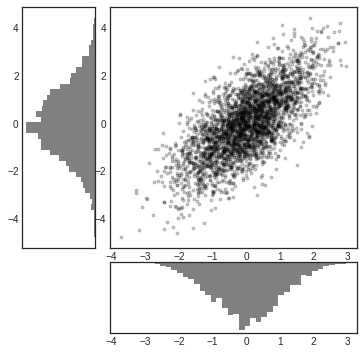

In [0]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

Text(0.5, 1.0, 'Frequency of ZONA_ESCOLAR')

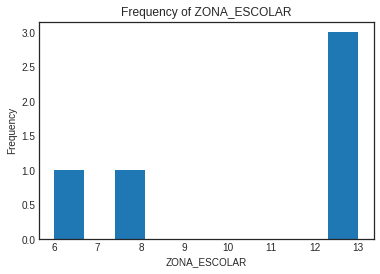

In [0]:
df_sample['ZONA_ESCOLAR'] = df_sample['ZONA_ESCOLAR'].astype('int64')
plt.hist(df_sample['ZONA_ESCOLAR'])
plt.xlabel('ZONA_ESCOLAR')
plt.ylabel('Frequency')
plt.title('Frequency of ZONA_ESCOLAR')

Text(0.5, 1.0, 'Box Plot of ZONA_ESCOLAR count')

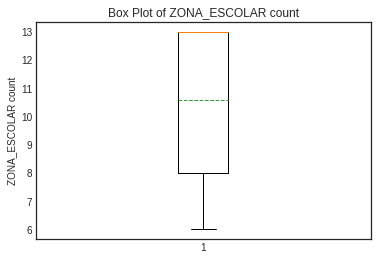

In [0]:
plt.boxplot(df_sample['ZONA_ESCOLAR'], showmeans=True, meanline=True)
plt.ylabel('ZONA_ESCOLAR count')
plt.title('Box Plot of ZONA_ESCOLAR count')